$ \theta = \{\psi, \sigma, \tau\} $

$\psi$: Parametros para definição do modelo que será utilizado em cada estado<br>
$\sigma$: Parametros 1 para cada Modelo $\{\sigma_1, \sigma_2, ...\}$ <br>
$\tau$: Parametros 2 para cada Modelo $\{\tau_1, \tau_2, ...\}$ <br>

$ \beta: S \mapsto [0,1]^k \;\; onde \;\; k = |\sigma|$ <br>
$ \beta(s; \psi)_i = p_{\psi}(\sigma_i | s) \; \forall \; i \in (1, 2, ..., k)$ <br>
A função $ \beta $ define a probabilidade de cada parametro em $ \sigma $ ser o modelo utilizado pra gerar a transição em um estado <br>

$\mu: S \times S \times A \times \sigma \times \tau \mapsto [0,1] $ <br>
$\mu(s', s, a, \sigma_x, \tau_x)= p_{\sigma_x,\tau_x}(s'|s,a)$ <br>
A função $ \mu $ define a probabilidade de transição para um estado, dado um par de estado e ação, seguindo o modelo $\sigma_x$ e $\tau_x$ <br>

$p_{\theta}(s_{t+1}|s_t, a_t) = \mu(s_{t+1}, s_t, a_t, \sigma_1, \tau_1) \; \times \; \beta(s_t)_1 + \mu(s_{t+1}, s_t, a_t, \sigma_2, \tau_2) \; \times \; \beta(s_t)_2 + ...$


$p_{\theta}(s_{t+1}|s_t, a_t) = \sum_{i=1}^k \mu(s_{t+1}, s_t, a_t, \sigma_i, \tau_i) \beta(s_t)_i \;\;\;\;\; for \;\; k = |\sigma_{\theta}|$  


$\mu: S \times S \times A \times \sigma_{\theta} \times \tau_{\theta} \mapsto [0,1]; \;\; \mu(s', s, a, \sigma, \tau) = pdf(s'_x, (s_x+(a_x \times \tau)), \sigma) \; \times \; pdf(s'_y, (s_y+ (a_y \times \tau)), \sigma)$

$\cal{L}[\xi | \theta] = \sum_{t=0}^{\mathrm{T}-1} log \; p_{\theta}(s_{t+1}|s_t, a_t)$

In [1]:
from environment import NormalMoveEnv
from experiment import Trajectory
from nn import BetaModel, Model
from rl import Agent

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline

# RL Model

c:\Users\guilherme.albarrans\OneDrive - Ame Digital\Área de Trabalho\RL\RL\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


<AxesSubplot: >

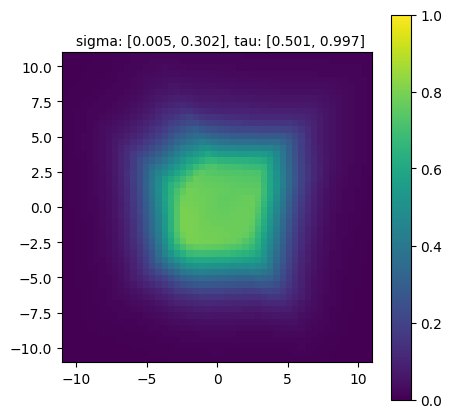

In [2]:
env = NormalMoveEnv()
a = Agent(env, lr=1e-7)
a.train(episodes=1000, epochs=100)
a.model.plot()

<AxesSubplot: >

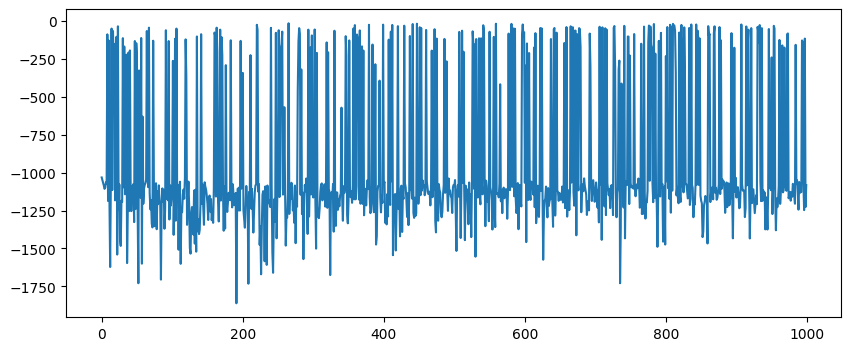

In [3]:
a.plot()

In [5]:
a.Q

array([[[-1.00000000e-01,  0.00000000e+00,  0.00000000e+00,
         -1.00000000e+02],
        [-1.00000000e-01, -1.00000000e+02, -1.09000000e-01,
         -1.00000000e-01],
        [-1.00000000e-01, -1.90000000e+02,  0.00000000e+00,
         -1.00000000e-01],
        ...,
        [-1.00000000e-01, -1.90000000e+02, -1.90000000e-01,
         -1.17100000e-01],
        [-1.00000000e-01, -1.00000000e+02, -1.00000000e-01,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00, -1.00000000e+02,
         -1.00000000e-01]],

       [[-1.90000000e-01, -1.00000000e-01,  0.00000000e+00,
          0.00000000e+00],
        [-1.00000000e-01, -1.90000000e-01, -1.98100000e-01,
         -1.00000000e-01],
        [-1.00000000e-01, -2.71000000e-01, -1.00000000e-01,
         -1.00000000e-01],
        ...,
        [ 0.00000000e+00, -1.90000000e-01, -1.00000000e-01,
         -1.90000000e-01],
        [-1.00000000e-01, -1.00000000e-01,  0.00000000e+00,
         -1.00000000e-01],
        [-1.000